## **Red neuronal utlizando el dataset Iris**

## Introducción

## Red neuronal

![title](https://www.ibm.com/support/knowledgecenter/es/SS3RA7_sub/modeler_mainhelp_client_ddita/clementine/images/nn.jpg)


Una red neuronal es un modelo simplificado que emula de manera burda el modo en que el cerebro humano procesa la información: funciona utilizando un número elevado de unidades de procesamiento interconectadas que parecen versiones abstractas de neuronas.

Las unidades de procesamiento se organizan en capas. Hay tres partes normalmente en una red neuronal: 
- una capa de entrada, con unidades que representan los campos de entrada; 
- una o varias capas ocultas; y 
- una capa de salida, con una unidad o unidades que representa el campo o los campos de destino. 

Las unidades se conectan con fuerzas de conexión variables (ponderaciones o pesos). Los datos de entrada se presentan en la primera capa, y los valores se propagan desde cada neurona hasta cada neurona de la capa siguiente. Finalmente, se envía un resultado desde la capa de salida.

La red aprende examinando los registros individuales, generando una predicción para cada registro y realizando ajustes a las ponderaciones cuando realiza una predicción incorrecta. Este proceso se repite muchas veces y la red sigue mejorando sus predicciones hasta haber alcanzado uno o varios criterios de parada.

Al principio, todas las ponderaciones son aleatorias y las respuestas que resultan de la red son, posiblemente, erróneas. La red aprende a través del entrenamiento. Continuamente se presentan a la red ejemplos para los que se conoce el resultado, y las respuestas que proporciona se comparan con los resultados conocidos. La información procedente de esta comparación se pasa hacia atrás a través de la red, cambiando las ponderaciones gradualmente. A medida que progresa el entrenamiento, la red se va haciendo cada vez más precisa en la replicación de resultados conocidos. Una vez entrenada, la red se puede aplicar a casos futuros en los que se desconoce el resultado.


## El dataset

Para este ejemplo utilizaremos un famoso dataset que contiene datos de tres especies de Iris, puedes consultar información sobre el dataset [aquí](http://archive.ics.uci.edu/ml/datasets/Iris/).

```
Información de atributos:

1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class:
-- Iris Setosa
-- Iris Versicolour
-- Iris Virginica
```
Este conjunto de datos contiene 50 muestras de cada una de tres especies de Iris: Iris setosa, Iris virginica e Iris versicolor, para cada una de estas especies se midieron cuatro rasgos de cada muestra: la longitud y el ancho de los sépalos y pétalos. Los sépalos son los que envuelven a las otras piezas florales en las primeras fases de desarrollo, cuando la flor es solo un capullo, por su parte los pétalos son la parte inferior del perianto y comprende las partes estériles de una flor.

![Tipos de Iris](https://live.staticflickr.com/7866/47075467621_85ab810139_c.jpg)

En la siguiente foto podemos apreciar la diferencia entre sépalos y pétalos.

![sepalopetalo](https://live.staticflickr.com/7872/40110698543_23f5e6c0ef_m.jpg)

In [ ]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()

In [ ]:
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

Cargamos el dataset de iris, esto se puede realizar a traves de lecturas del dataset individual, asi como tambien se puede realizar de manera separada utilizando el dataset directamente de sklearn

In [ ]:
# Cargamos los datos en un Dataframe
df = pd.DataFrame(iris.data, columns=iris.feature_names)
# Convertimos los valores a tipo float
df = df.astype(float)
# agregamos la columna "target" y la nombramos "label"
df['label'] = iris.target
# Usaremos etiquetas textuales
df['label'] = df.label.replace(dict(enumerate(iris.target_names)))
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


## Información del Dataset

In [ ]:
#Analizamos los datos que tenemos disponibles
print('Información del dataset:')
print(df.info())

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   label              150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


## Descripción estadística del dataset

In [ ]:
print('Descripción estadística del dataset:')
df.describe()

Descripción estadística del dataset:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Distribución de los datos

Verificamos la distribución de los datos de acuerdo a las especies de Iris, para ello utilizamos la instrucción groupby, especificando la columna label y el tamaño de la misma

In [ ]:
print('Distribución de las especies de Iris:')
print(df.groupby('label').size())

Distribución de las especies de Iris:
label
setosa        50
versicolor    50
virginica     50
dtype: int64


Hacemos one-hot encoding de las etiquetas, esto es, cambiar la manera en la que describimos las etiquetas, en lugar de utilizar el texto que normalmente se le da, o "nombre" vamos a utilizar tres valores diferentes para definir cada una de las posibles clases, creando un vector de tres espacios
Ej. Iris Setosa = [1,0,0]

In [ ]:
# label -> one-hot encoding
label = pd.get_dummies(df['label'])
label.columns = ['label_' + str(x) for x in label.columns]
df = pd.concat([df, label], axis=1)# drop old label
df.drop(['label'], axis=1, inplace=True)



In [ ]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label_setosa,label_versicolor,label_virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


In [ ]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label_setosa,label_versicolor,label_virginica
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1
149,5.9,3.0,5.1,1.8,0,0,1


Separamos los datos entre, caracteristicas (X) y etiquetas (Y)

In [ ]:
# Creamos X and y
X = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
# Convertimos el DataFrame en un arreglo de numpy
X = np.asarray(X)
y = df[['label_setosa', 'label_versicolor', 'label_virginica']]
# Convertimos el DataFrame en un arreglo de numpy
y = np.asarray(y)

Creamos nuestro vector de clases para uso futuro

In [ ]:
class_names = ['setosa','versicolor','virginica']

Separamos ambos conjuntos (X,Y) en diferentes sub-conjuntos, uno de entrenamiento y otro de validacion.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
  X,
  y,
  test_size=0.25
)

print(y_test)

[[0 0 1]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [1 0 0]
 [0 1 0]
 [0 0 1]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]]


In [ ]:
print(X_train.shape)

(112, 4)


Declaramos el modelo de la red neuronal que vamos a utilizar, para esto debemos observar 2 cosas principalmente, la primera es la dimension de las caracteristicas de los datos que buscamos etiquetar (X) y por ultimo la dimension de las etiquetas que tenemos disponibles (Y), estas dimensiones deben de coincidir con nuestra capa de entrada (X) y capa de salida (Y) respectivamente.

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(32, activation='relu', input_shape=(4,)), #Input
    keras.layers.Dense(16, activation='relu'), #Hidden
    keras.layers.Dense(3, activation='softmax') #Output
])
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_34 (Dense)             (None, 17)                85        
_________________________________________________________________
dense_35 (Dense)             (None, 3)                 54        
Total params: 159
Trainable params: 159
Non-trainable params: 0
_________________________________________________________________


Compilamos el modelo que acabamos de declarar, esto es, le agregamos el algoritmo de optimización que utilizará el modelo para alcanzar la "convergencia", existen una gran cantidad de algoritmos de optimizacion y cada uno tiene sus caracteristicas y sus usos exclusivos, no existe el hilo negro.

De la misma manera agregamos también las métricas que utilizaremos para evaluar el modelo y la función de pérdida.

In [ ]:
model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

Entrenamos el modelo, utilizando los datos de entrenamiento

In [ ]:
history = model.fit(X_train, y_train,
                    batch_size= 64,
                    epochs=500,
                    validation_split=0.2
                   )

Epoch 1/500
2/2 [==============================] - 0s 21ms/step - loss: 0.5497 - accuracy: 0.8539 - val_loss: 0.5151 - val_accuracy: 0.8696
Epoch 2/500
2/2 [==============================] - 0s 9ms/step - loss: 0.5473 - accuracy: 0.8315 - val_loss: 0.5141 - val_accuracy: 0.8696
Epoch 3/500
2/2 [==============================] - 0s 11ms/step - loss: 0.5456 - accuracy: 0.8315 - val_loss: 0.5119 - val_accuracy: 0.8696
Epoch 4/500
2/2 [==============================] - 0s 9ms/step - loss: 0.5439 - accuracy: 0.8315 - val_loss: 0.5116 - val_accuracy: 0.8696
Epoch 5/500
2/2 [==============================] - 0s 10ms/step - loss: 0.5425 - accuracy: 0.8652 - val_loss: 0.5115 - val_accuracy: 0.9130
Epoch 6/500
2/2 [==============================] - 0s 10ms/step - loss: 0.5405 - accuracy: 0.8764 - val_loss: 0.5086 - val_accuracy: 0.9130
Epoch 7/500
2/2 [==============================] - 0s 12ms/step - loss: 0.5385 - accuracy: 0.8989 - val_loss: 0.5049 - val_accuracy: 0.8696
Epoch 8/500
2/2 [=====

Con la informacion del entrenamiento, podemos graficar las diferentes métricas utilizadas para medir el modelo de reconocimiento

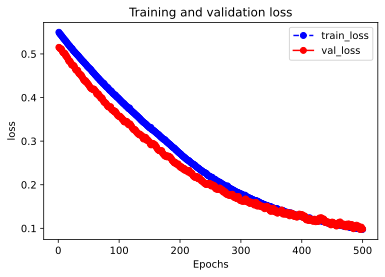

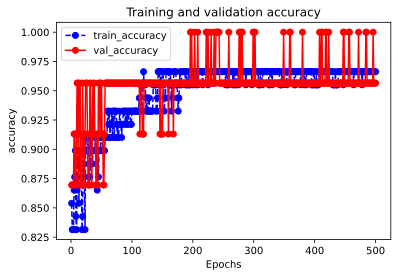

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics, 'bo--')
    plt.plot(epochs, val_metrics, 'ro-')
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

plot_metric(history, 'loss')
plot_metric(history, 'accuracy')

In [ ]:
model.evaluate(x = X_test,y = y_test)

2/2 [==============================] - 0s 2ms/step - loss: 0.1419 - accuracy: 0.9211


[0.14190901815891266, 0.9210526347160339]

### Probando con un dato individual

In [ ]:
n = 30
dato_simple = np.array(X_test[n])
print(dato_simple)
print(dato_simple.shape)
print(y_test[n])
print(class_names[np.argmax(y_test[n])])

[5.7 2.6 3.5 1. ]
(4,)
[0 1 0]
versicolor


### Cambiamos la forma del dato individual para poder pasarlo al modelo

In [ ]:
dato_simple = (np.expand_dims(dato_simple,0))
print(dato_simple.shape)

(1, 4)


In [ ]:
print(dato_simple)
print(dato_simple.shape)

[[5.7 2.6 3.5 1. ]]
(1, 4)


In [ ]:
prediccion = model.predict(dato_simple)

In [ ]:
print(class_names[np.argmax(prediccion[0])])

versicolor
